Shape: (9800, 18)

Data Types:

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

Missing Values:

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64
Total Sales: 2252607.4127
Top 5 Products by Sales:


<ipython-input-2-93c22aaaaa1d>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='category', y='sales', estimator=sum, palette='viridis')


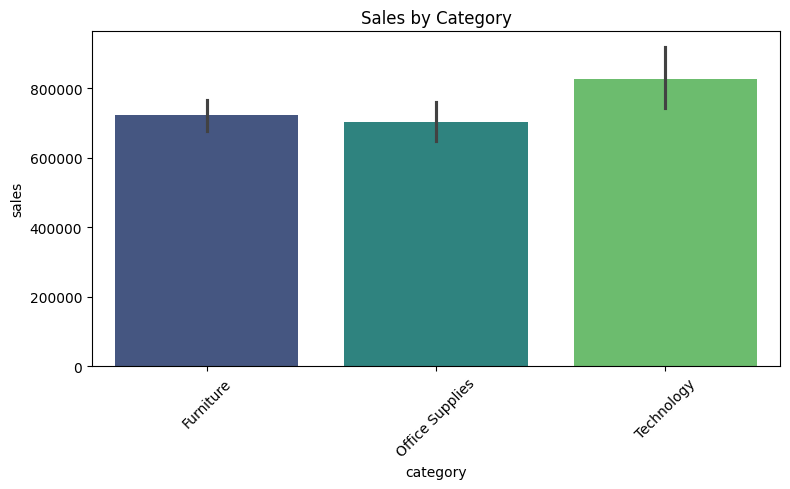

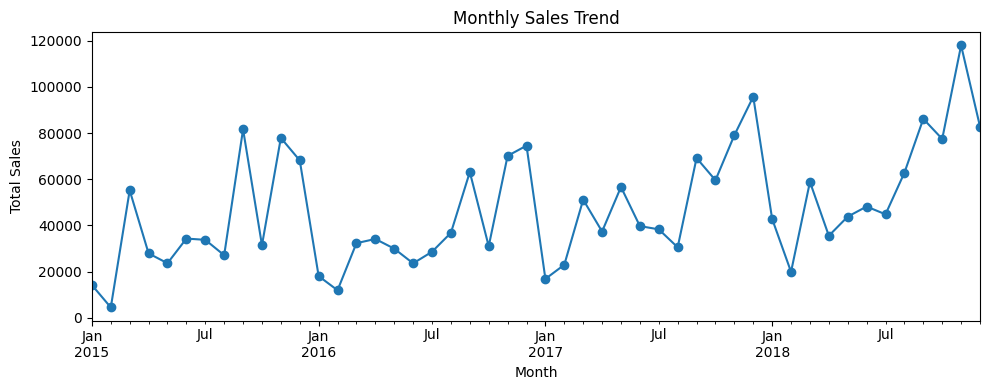

In [2]:
# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Load the dataset
df = pd.read_csv('/content/supermarket.csv')

# STEP 3: Preview the data
print("Shape:", df.shape)
df.head()

# STEP 4: Basic Info
print("\nData Types:\n")
print(df.dtypes)
print("\nMissing Values:\n")
print(df.isnull().sum())

# STEP 5: Clean the data
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Optional: Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# STEP 6: Convert date columns if applicable
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')

# STEP 7: Basic analysis
print("Total Sales:", df['sales'].sum() if 'sales' in df.columns else "Sales column not found")
print("Top 5 Products by Sales:")
if 'product' in df.columns and 'sales' in df.columns:
    print(df.groupby('product')['sales'].sum().sort_values(ascending=False).head())

# STEP 8: Visualization Examples

# 1. Sales by Category
if 'category' in df.columns and 'sales' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='category', y='sales', estimator=sum, palette='viridis')
    plt.title("Sales by Category")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2. Monthly Sales Trend
if 'order_date' in df.columns and 'sales' in df.columns:
    df['month'] = df['order_date'].dt.to_period('M')
    monthly_sales = df.groupby('month')['sales'].sum()
    monthly_sales.plot(kind='line', marker='o', figsize=(10, 4), title="Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.tight_layout()
    plt.show()
